# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_columns', 25)

In [4]:
import sys
sys.path.append(r'D:\Usuarios\Kitty\Documentos\1-Master\TFM')

# Load Data

In [5]:
df = pd.read_csv("UCI_Credit_Card.csv")

In [6]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# Preprocessing

In [7]:
# Cambiamos el nombre de las columnas por uno más descriptivo

descriptive_columns = {
    'ID': 'Id',
    'LIMIT_BAL': 'CreditLimit',
    'SEX': 'Gender',
    'EDUCATION': 'EducationLevel',
    'MARRIAGE': 'Marriage',
    'AGE': 'Age',
    'PAY_0': 'RepaymentStatusSep',
    'PAY_2': 'RepaymentStatusAug',
    'PAY_3': 'RepaymentStatusJul',
    'PAY_4': 'RepaymentStatusJun',
    'PAY_5': 'RepaymentStatusMay',
    'PAY_6': 'RepaymentStatusApr',
    'BILL_AMT1': 'BillAmountSep',
    'BILL_AMT2': 'BillAmountAug',
    'BILL_AMT3': 'BillAmountJul',
    'BILL_AMT4': 'BillAmountJun',
    'BILL_AMT5': 'BillAmountMay',
    'BILL_AMT6': 'BillAmountApr',
    'PAY_AMT1': 'PreviousPaymentSep',
    'PAY_AMT2': 'PreviousPaymentAug',
    'PAY_AMT3': 'PreviousPaymentJul',
    'PAY_AMT4': 'PreviousPaymentJun',
    'PAY_AMT5': 'PreviousPaymentMay',
    'PAY_AMT6': 'PreviousPaymentApr',
    'default.payment.next.month': 'Default'
}

df.rename(columns=descriptive_columns, inplace=True)

In [9]:
# Convert categorical variables with their appropriate labels based on the provided descriptions
df['Gender'] = df['Gender'].map({1: 'Male', 2: 'Female'})
df['EducationLevel'] = df['EducationLevel'].replace({
    0: np.nan,
    1: 'Graduate School', 
    2: 'University', 
    3: 'High School', 
    4: 'Others', 
    5: 'Unknown', 
    6: 'Unknown'
})
df['Marriage'] = df['Marriage'].replace({
    1: 'Married', 
    2: 'Single', 
    3: 'Others', 
    0: 'Unknown'
})

# For repayment status, values range from -1 (paid duly) to 9 (severe delay)
repayment_status_mapping = {
    -2: np.nan,
    -1: 'Paid Duly',
     0: 'No Consumption',
     1: 'Delay 1 Month',
     2: 'Delay 2 Months',
     3: 'Delay 3 Months',
     4: 'Delay 4 Months',
     5: 'Delay 5 Months',
     6: 'Delay 6 Months',
     7: 'Delay 7 Months',
     8: 'Delay 8 Months',
     9: 'Delay 9+ Months'
}

# Applying this mapping to all repayment status columns
repayment_columns = [x for x in df.columns if 'RepaymentStatus' in x]
for col in repayment_columns:
    df[col] = df[col].map(repayment_status_mapping)

In [10]:
df.head()

,Id,CreditLimit,Gender,EducationLevel,Marriage,Age,RepaymentStatusSep,RepaymentStatusAug,RepaymentStatusJul,RepaymentStatusJun,RepaymentStatusMay,RepaymentStatusApr,BillAmountSep,BillAmountAug,BillAmountJul,BillAmountJun,BillAmountMay,BillAmountApr,PreviousPaymentSep,PreviousPaymentAug,PreviousPaymentJul,PreviousPaymentJun,PreviousPaymentMay,PreviousPaymentApr,Default
0,1,20000.0,Female,University,Married,24,Delay 2 Months,Delay 2 Months,Paid Duly,Paid Duly,NaN,NaN,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,Paid Duly,Delay 2 Months,No Consumption,No Consumption,No Consumption,Delay 2 Months,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57,Paid Duly,No Consumption,Paid Duly,No Consumption,No Consumption,No Consumption,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Parameters

In [11]:
target = "Default"

# EDA

In [101]:
from EDA import EDAProcessor

In [112]:
eda = EDAProcessor(
    target=target,
    ordinal_columns=["EducationLevel"],
    exclude_columns=["Id"]
)

In [113]:
eda.run(df)

Starting EDA...



In [114]:
eda.distribution_variable(df, "Age", n_bins=10)

Age
[21, 26)    3871
[26, 32)    8359
[32, 38)    6728
[38, 44)    5056
[44, 50)    3306
[50, 56)    1836
[56, 62)     628
[62, 68)     171
[68, 74)      40
[74, 80)       5
Name: count, dtype: int64

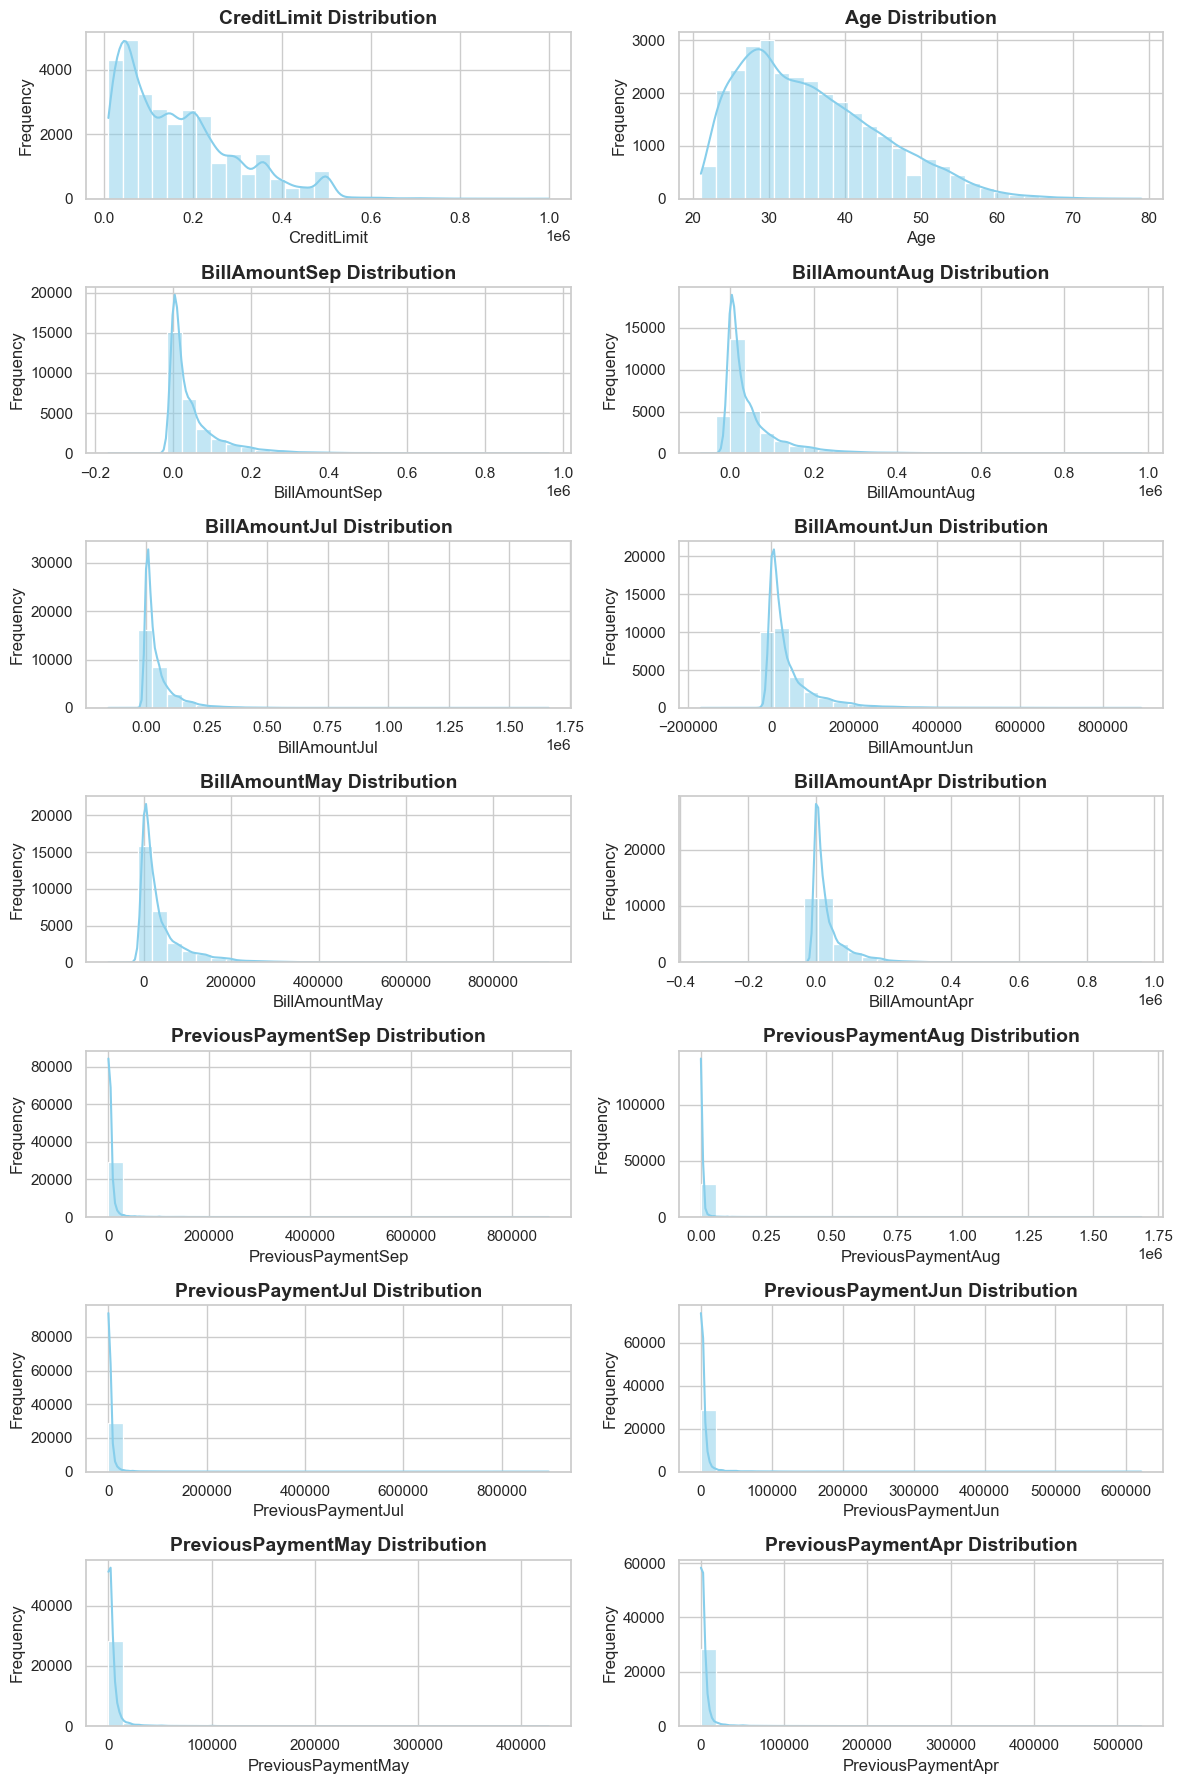

In [115]:
eda.plot_numerical_variables(df, 7, 2)

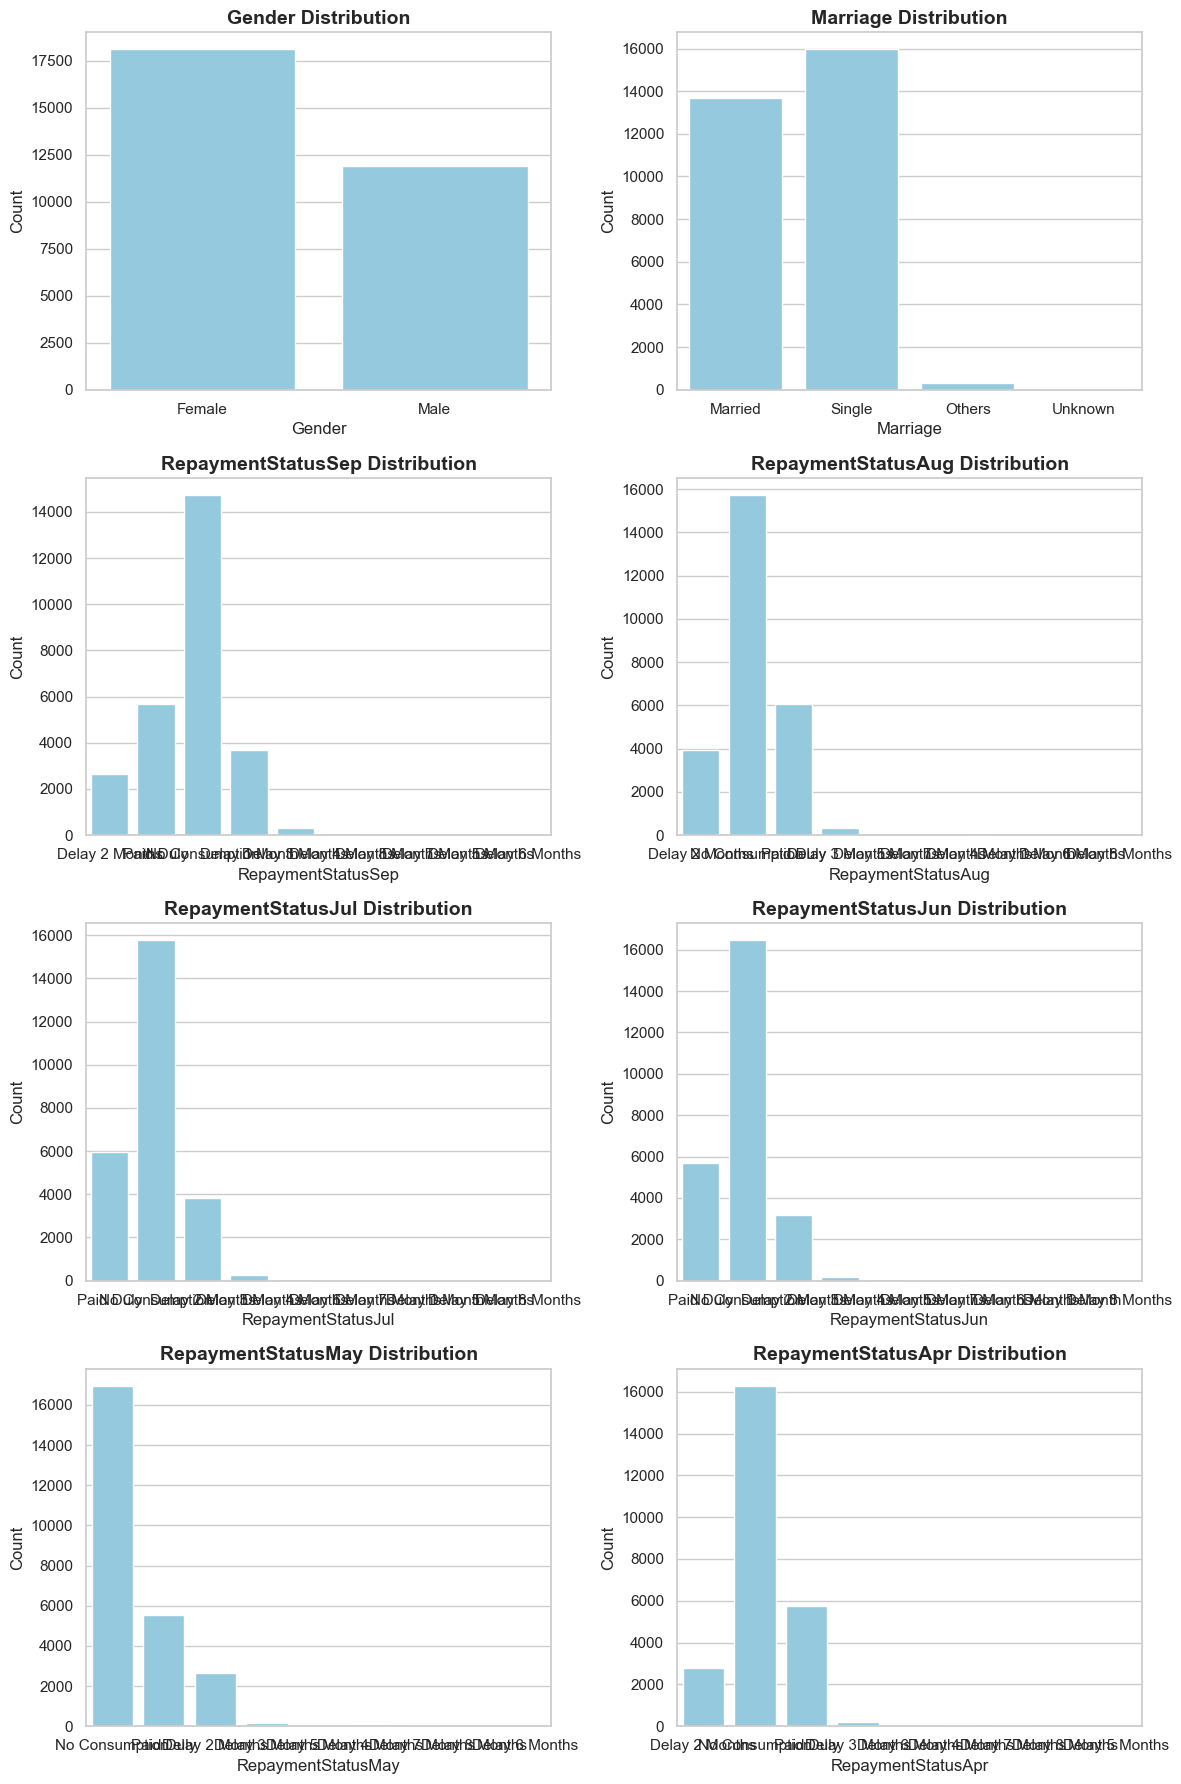

In [116]:
eda.plot_categorical_variables(df, n_rows=4, n_cols=2)

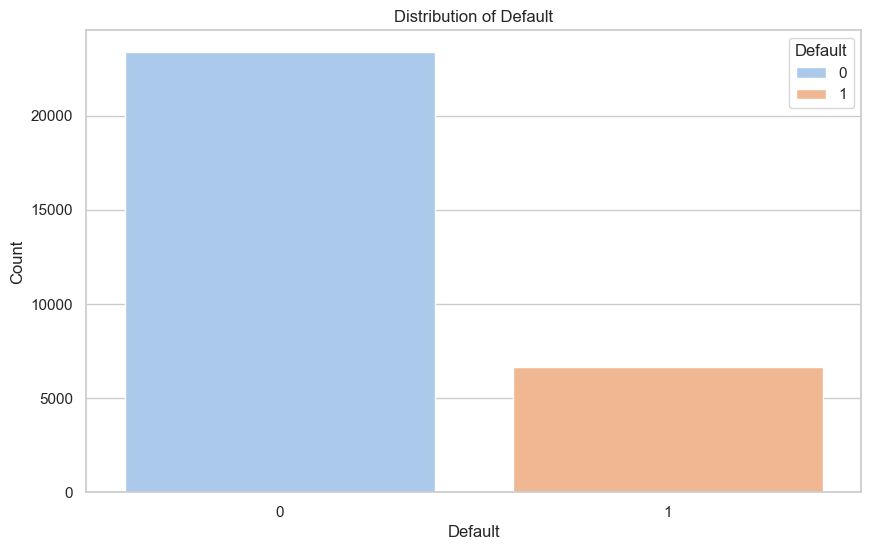

In [117]:
eda.plot_target(df)

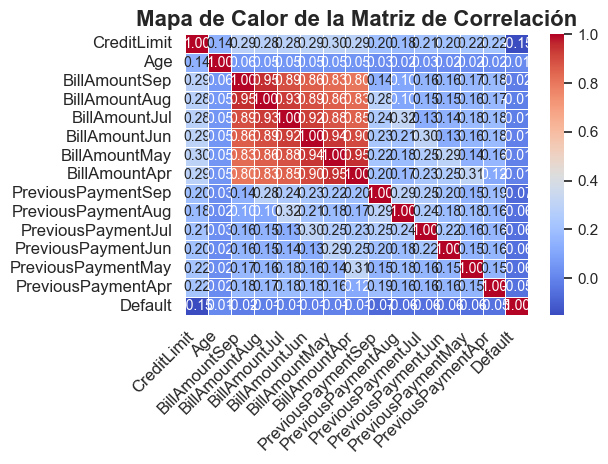

In [118]:
eda.plot_correlations()

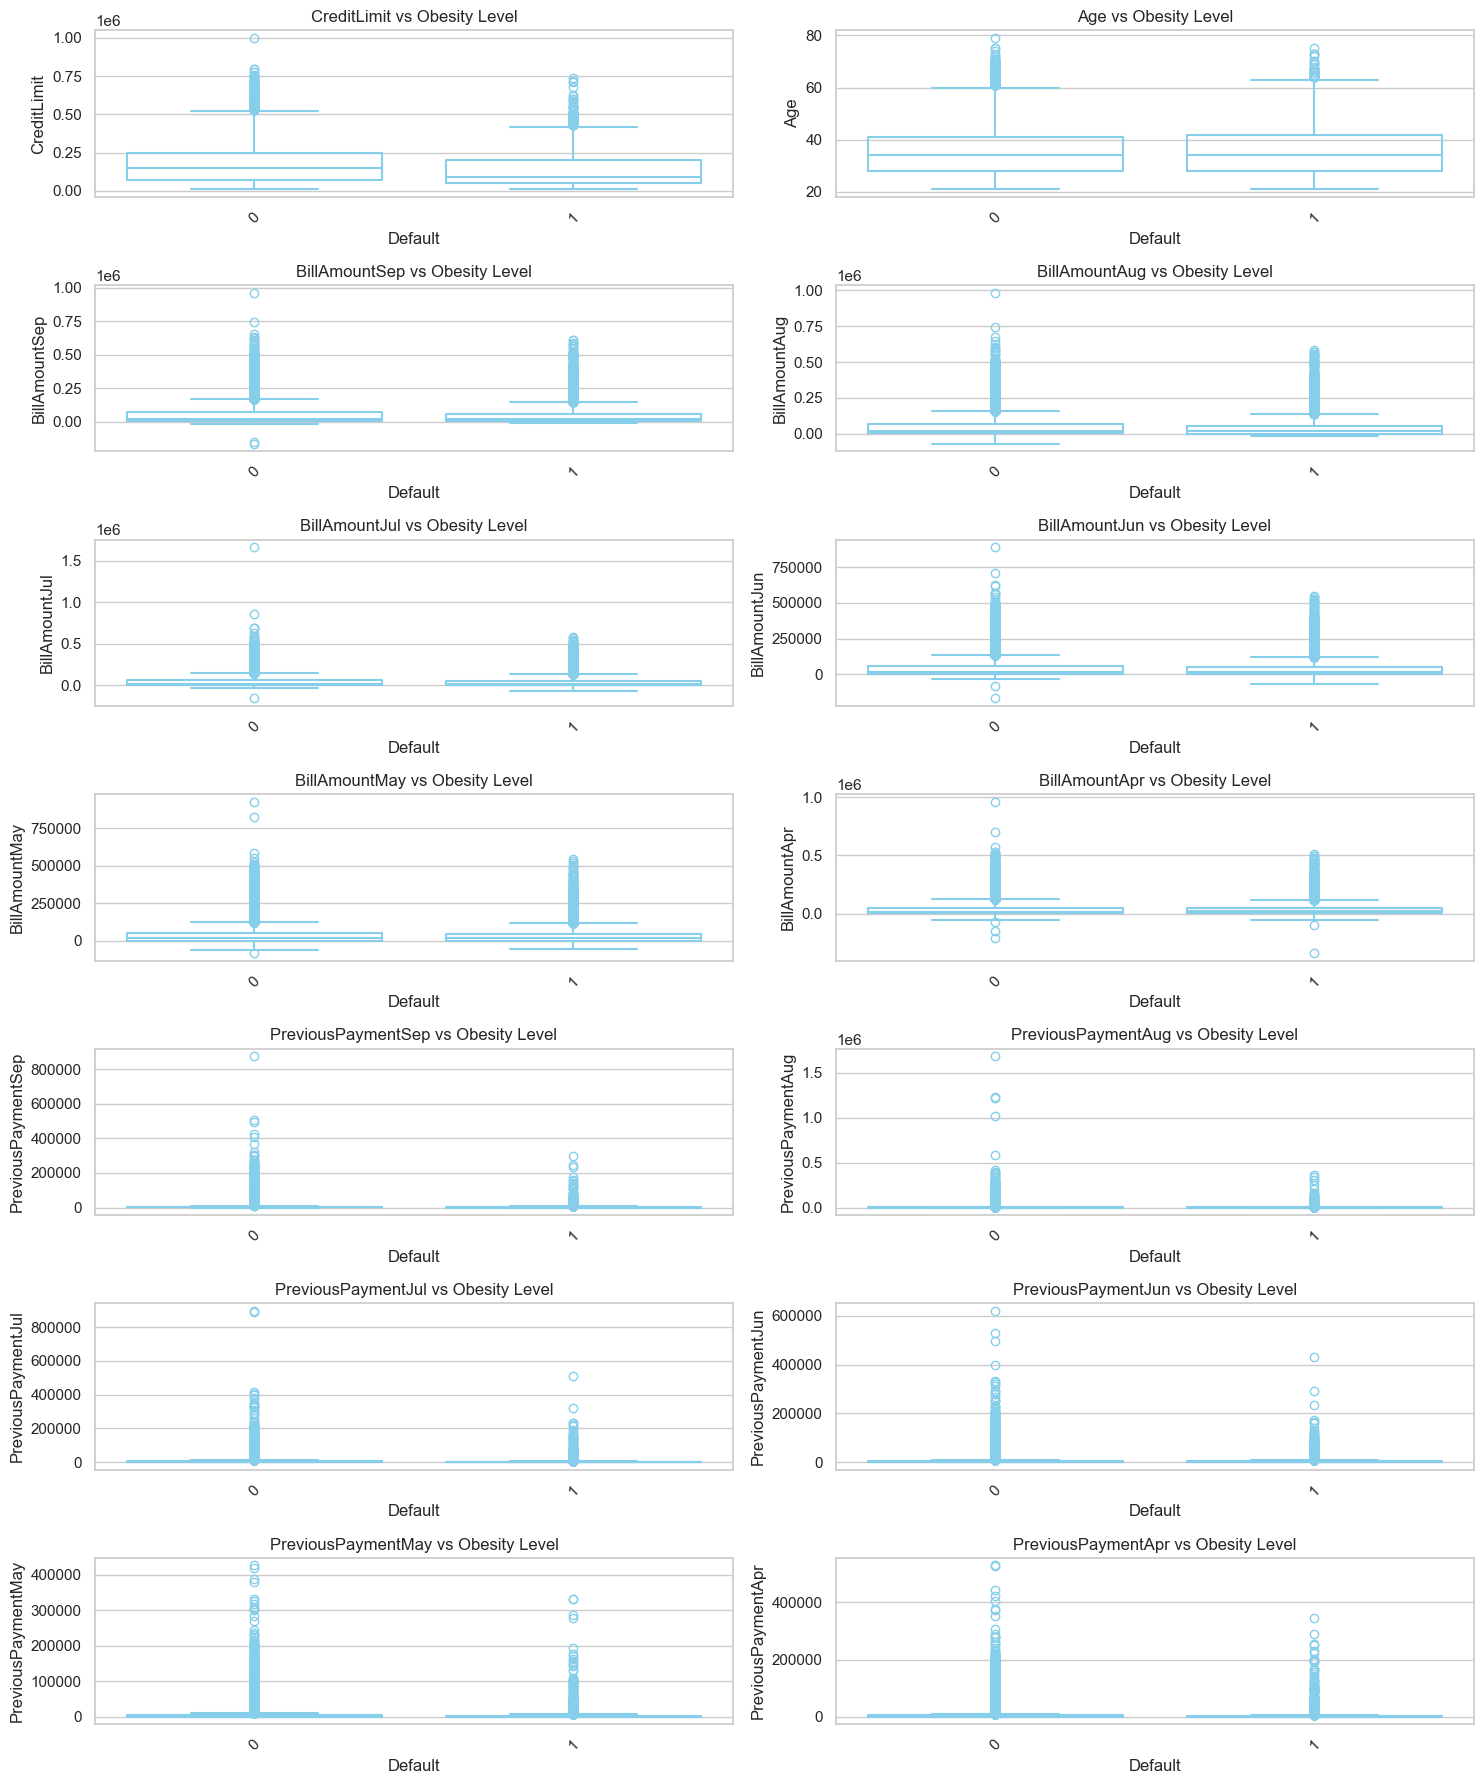

In [122]:
eda.plot_numerical_vs_target(df, n_rows=7, n_cols=2)

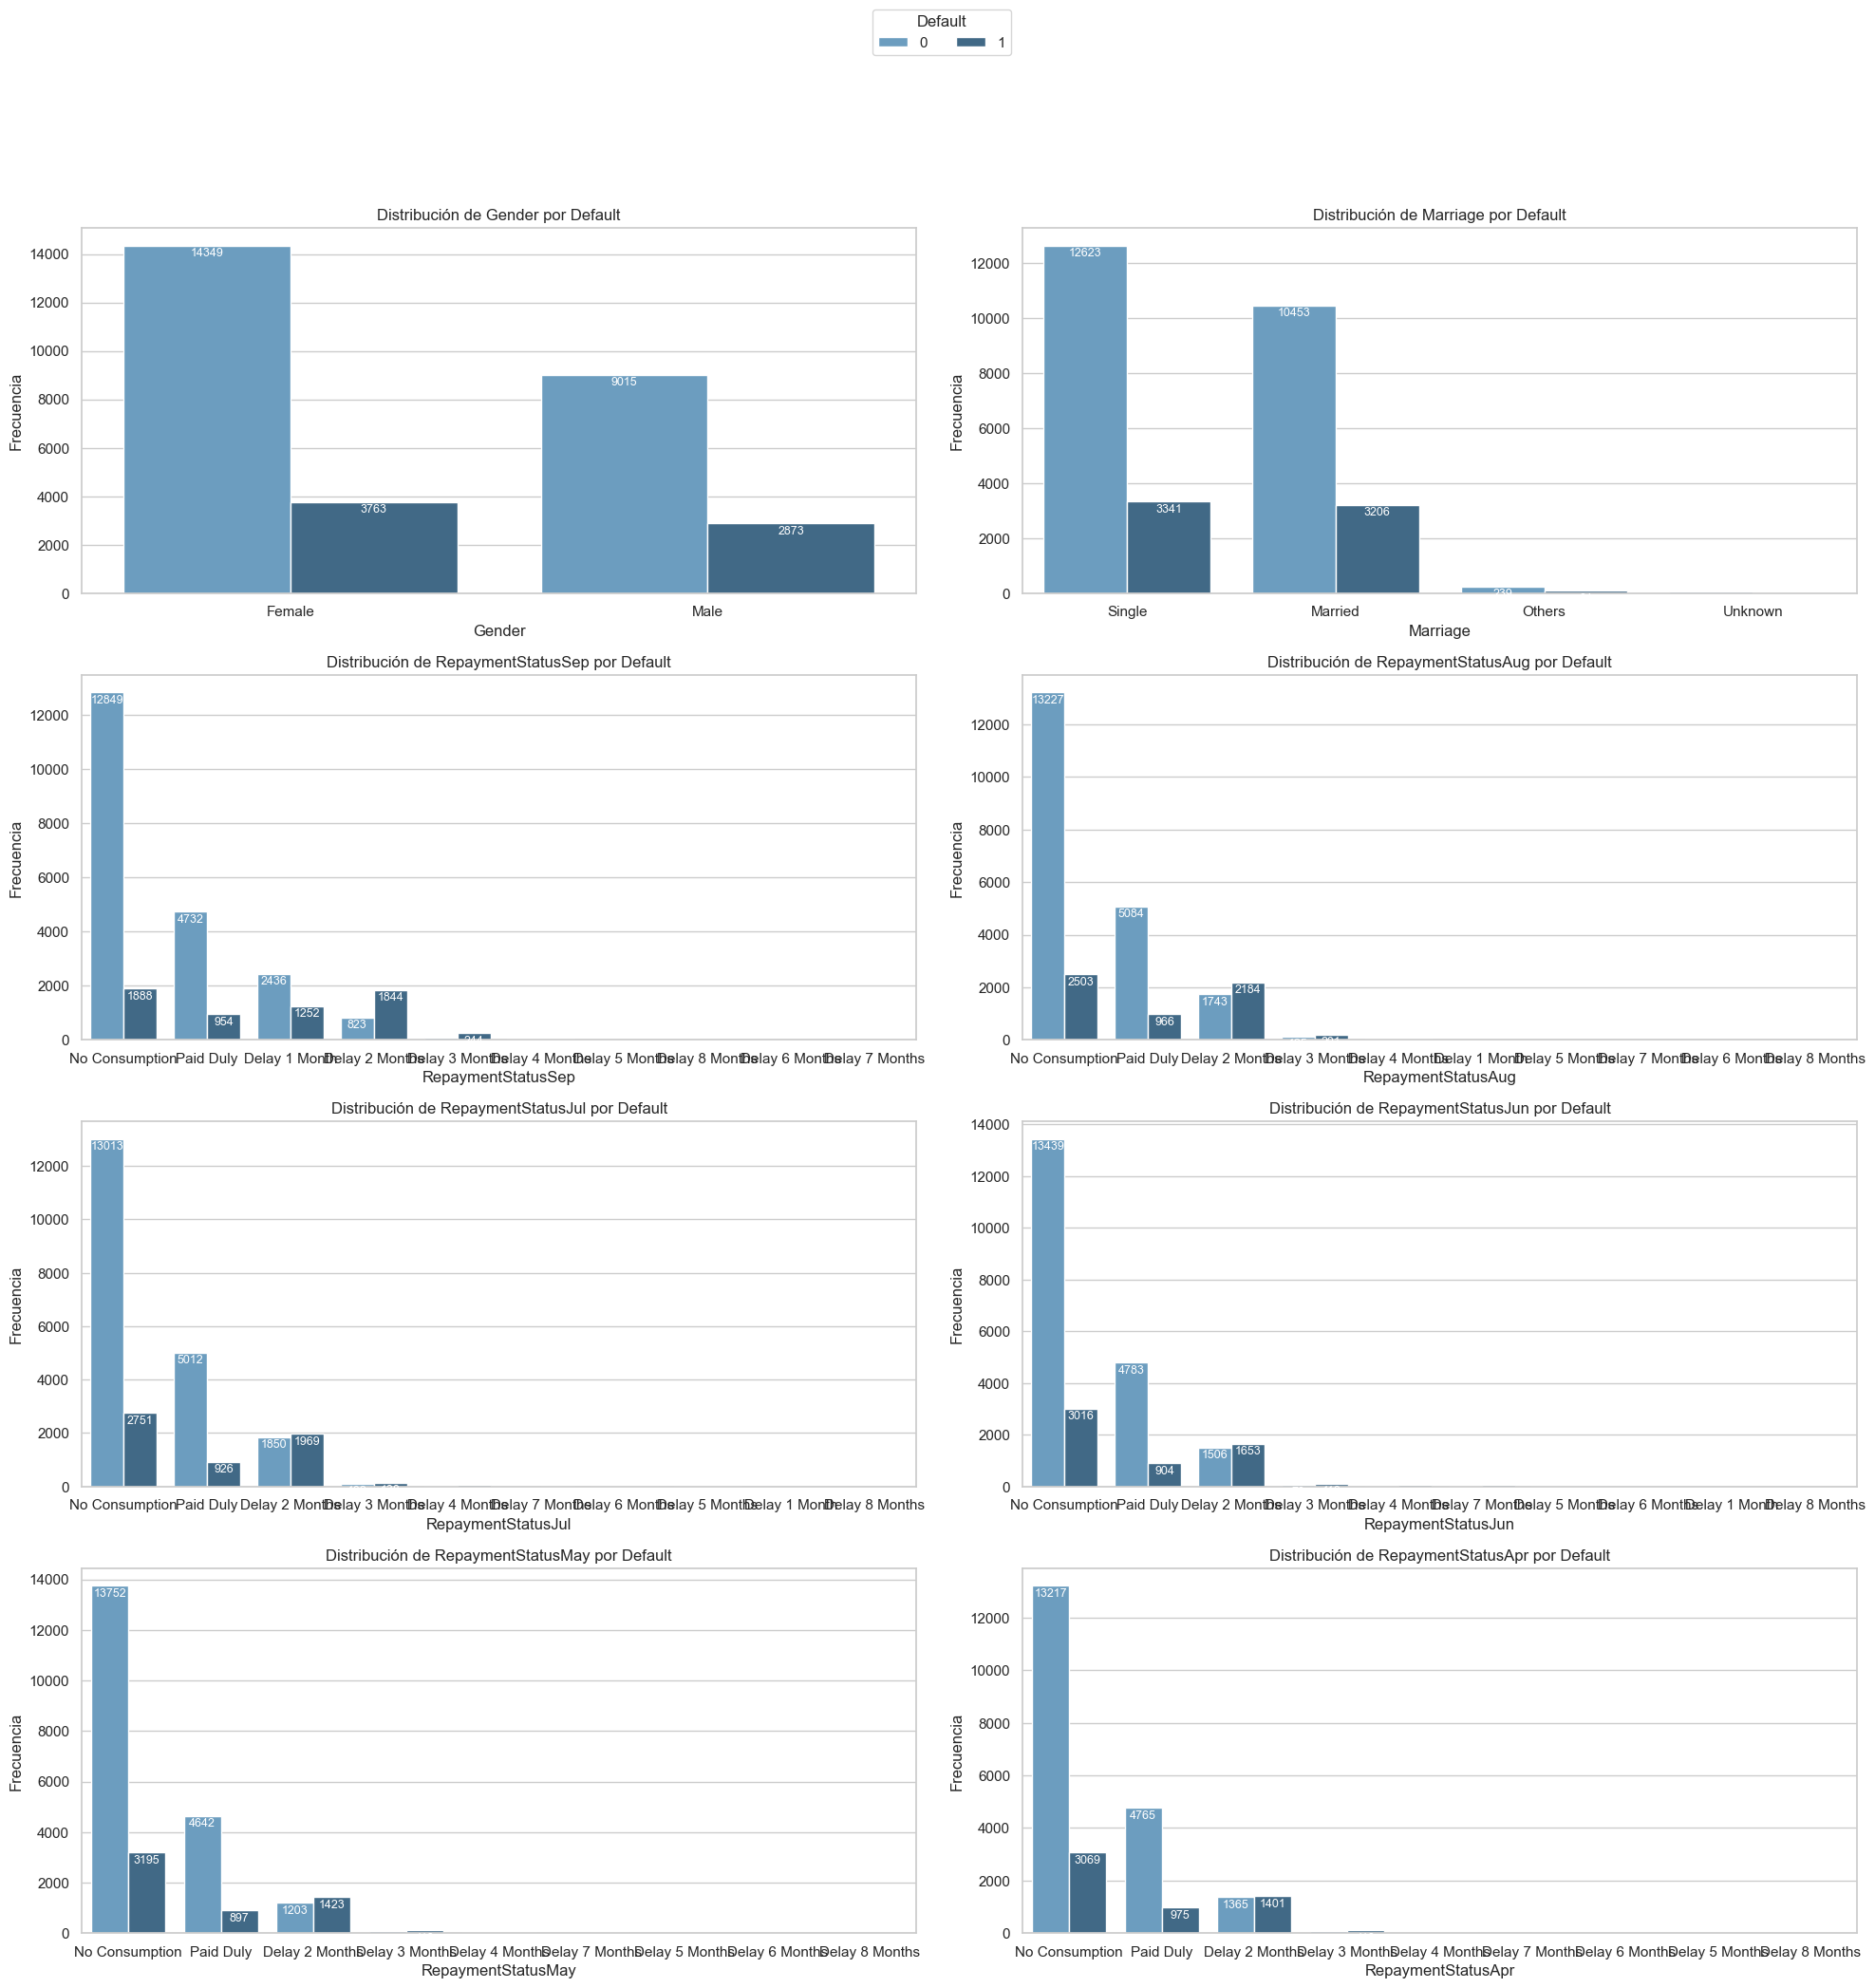

In [123]:
eda.plot_histogram_vs_target(df, n_rows=4, n_cols=2)

In [109]:
eda.dict_column

{'Id': {'dtype': 'numerical',
  'n_missing': 0,
  'p_missing': 0.0,
  'n_unique': 30000,
  'is_duplicate': False},
 'CreditLimit': {'dtype': 'numerical',
  'n_missing': 0,
  'p_missing': 0.0,
  'n_unique': 81,
  'is_duplicate': False},
 'Gender': {'dtype': 'categorical',
  'n_missing': 0,
  'p_missing': 0.0,
  'n_unique': 2,
  'is_duplicate': False},
 'EducationLevel': {'dtype': 'ordinal',
  'n_missing': 14,
  'p_missing': 0.04666666666666667,
  'n_unique': 5,
  'is_duplicate': False},
 'Marriage': {'dtype': 'categorical',
  'n_missing': 0,
  'p_missing': 0.0,
  'n_unique': 4,
  'is_duplicate': False},
 'Age': {'dtype': 'numerical',
  'n_missing': 0,
  'p_missing': 0.0,
  'n_unique': 56,
  'is_duplicate': False},
 'RepaymentStatusSep': {'dtype': 'categorical',
  'n_missing': 2759,
  'p_missing': 9.196666666666667,
  'n_unique': 10,
  'is_duplicate': False},
 'RepaymentStatusAug': {'dtype': 'categorical',
  'n_missing': 3782,
  'p_missing': 12.606666666666666,
  'n_unique': 10,
  'is_du